In [88]:
import pandas as pd

In [89]:
import matplotlib.pyplot as plt

In [90]:
import numpy as np

In [91]:
from sklearn.datasets import load_iris

In [92]:
iris=load_iris()

In [93]:
dir(iris) # it is used to see what are the cloumns in the data set

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [94]:
iris.feature_names # to see the features names 

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [95]:
iris.keys() # it is also used for to see the data set columns

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [96]:
# now form a table that contains the requires columns
df=pd.DataFrame(iris.data)

In [97]:
df

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [98]:
# now in order to add the column name that are present as feature names
df=pd.DataFrame(iris.data,columns=iris.feature_names)

In [99]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [100]:
df=df.drop(['petal length (cm)','petal width (cm)'],axis=1)

In [101]:
df

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
145,6.7,3.0
146,6.3,2.5
147,6.5,3.0
148,6.2,3.4


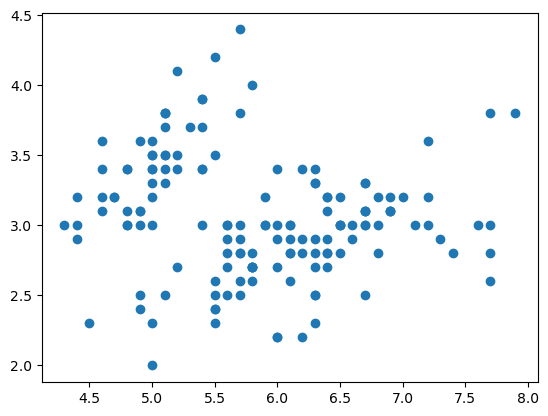

In [102]:
plt.scatter(df['sepal length (cm)'],df['sepal width (cm)'])

In [103]:
from sklearn.cluster import KMeans

In [104]:
k_value=range(1,11)
wcss=[]

In [105]:
for k in k_value:
    km=KMeans(n_clusters=k)
    km.fit(df)
    wcss.append(km.inertia_)

C:\Users\BHANU PRASAD\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\BHANU PRASAD\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\BHANU PRASAD\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\BHANU PRASAD\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to 

In [106]:
wcss

[130.47526666666667,
 58.44759246088193,
 37.08627024722932,
 28.41605724065525,
 26.818032635276335,
 18.118287142524995,
 15.52727684109263,
 13.285765687058793,
 11.137127338304973,
 10.54516982797904]

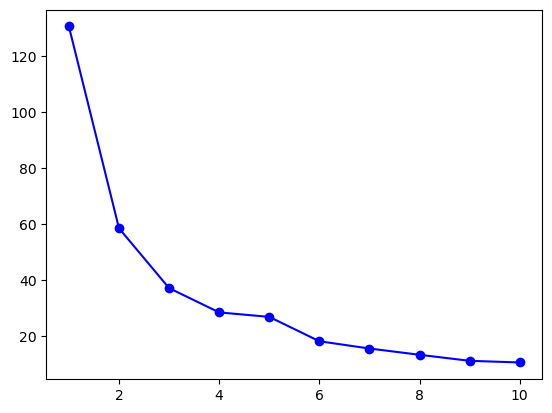

In [107]:
plt.plot(k_value,wcss,'bo-')


In [108]:
km=KMeans(n_clusters=3)

In [109]:
km.fit(df)

C:\Users\BHANU PRASAD\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3)

In [110]:
df['clusters']=km.labels_

In [111]:
df.head()

,sepal length (cm),sepal width (cm),clusters
0,5.1,3.5,2
1,4.9,3.0,2
2,4.7,3.2,2
3,4.6,3.1,2
4,5.0,3.6,2


In [112]:
df[df.clusters==1].head(5)

,sepal length (cm),sepal width (cm),clusters
50,7.0,3.2,1
51,6.4,3.2,1
52,6.9,3.1,1
54,6.5,2.8,1
56,6.3,3.3,1


In [113]:
x=df.drop('clusters',axis=1)

In [114]:
x.head()

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   clusters           150 non-null    int32  
dtypes: float64(2), int32(1)
memory usage: 3.1 KB


In [116]:
df.clusters.value_counts()

clusters
0    53
2    50
1    47
Name: count, dtype: int64

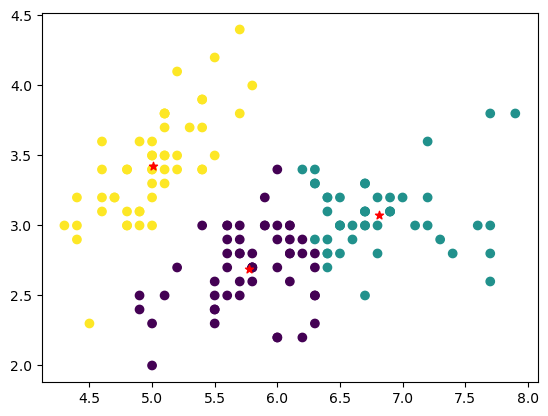

In [117]:
plt.scatter(df['sepal length (cm)'],df['sepal width (cm)'],c=km.labels_)
# plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1])
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],c='red',marker='*')


In [118]:
from sklearn.preprocessing import StandardScaler

In [119]:
scaler=StandardScaler()

In [120]:
scaled_x=scaler.fit_transform(x)

In [121]:
scaled_x

array([[-0.90068117,  1.01900435],
       [-1.14301691, -0.13197948],
       [-1.38535265,  0.32841405],
       [-1.50652052,  0.09821729],
       [-1.02184904,  1.24920112],
       [-0.53717756,  1.93979142],
       [-1.50652052,  0.78880759],
       [-1.02184904,  0.78880759],
       [-1.74885626, -0.36217625],
       [-1.14301691,  0.09821729],
       [-0.53717756,  1.47939788],
       [-1.26418478,  0.78880759],
       [-1.26418478, -0.13197948],
       [-1.87002413, -0.13197948],
       [-0.05250608,  2.16998818],
       [-0.17367395,  3.09077525],
       [-0.53717756,  1.93979142],
       [-0.90068117,  1.01900435],
       [-0.17367395,  1.70959465],
       [-0.90068117,  1.70959465],
       [-0.53717756,  0.78880759],
       [-0.90068117,  1.47939788],
       [-1.50652052,  1.24920112],
       [-0.90068117,  0.55861082],
       [-1.26418478,  0.78880759],
       [-1.02184904, -0.13197948],
       [-1.02184904,  0.78880759],
       [-0.7795133 ,  1.01900435],
       [-0.7795133 ,

In [129]:
scaled_df=pd.DataFrame(scaled_x,columns=['sepal length (cm)','sepal width '])

In [131]:
scaled_df.head()

,sepal length (cm),sepal width
0,-0.900681,1.019004
1,-1.143017,-0.131979
2,-1.385353,0.328414
3,-1.506521,0.098217
4,-1.021849,1.249201


In [132]:
km=KMeans(n_clusters=3)

In [133]:
km.fit(scaled_x)

C:\Users\BHANU PRASAD\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3)

In [135]:
scaled_df['clusters']=km.labels_

In [136]:
scaled_df.head()

,sepal length (cm),sepal width,clusters
0,-0.900681,1.019004,2
1,-1.143017,-0.131979,2
2,-1.385353,0.328414,2
3,-1.506521,0.098217,2
4,-1.021849,1.249201,2


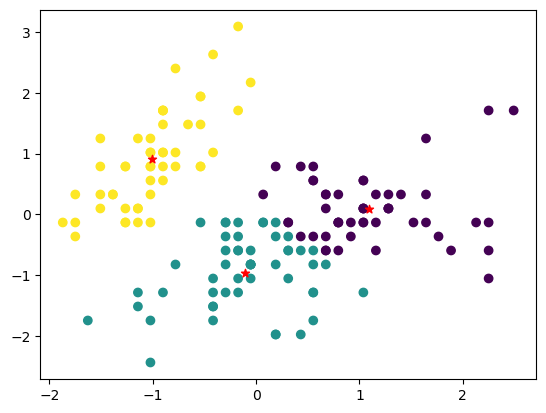

In [141]:
plt.scatter(scaled_df['sepal length (cm)'],scaled_df['sepal width '],c=km.labels_)
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],c='r',marker='*')